# 로지스틱 회귀


### 데이터 준비하기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [3]:
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀

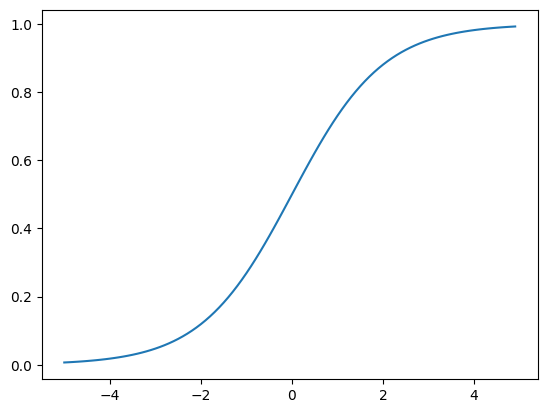

In [6]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

* 선형 함수를 이용해서 학습하고 분류

> 이진 분류: `sigmoid` 함수
* z 값의 값을 확률로 변경 (0~1 상의 값으로 변경)
  * 0.5를 기준으로 음성, 양성 클래스 분류

> 다중 분류: `softmax` 함수  

In [7]:
# 도미 빙어 분류 : 도미 빙어 추출
# 도미랑 빙어인 데이터만 True 아니면 False
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [8]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [10]:
# 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [12]:
# 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


* predict(): 범주를 예측하여 반환
* predict_praba(): 메소드는 **확률(probability)**을 반환

In [14]:
# 양성 음성 클래스 확인
print(lr.classes_)

['Bream' 'Smelt']


➡ 타깃 값을 알파벳순으로 정렬해 사용 (앞: 도미 == 음성, 뒤: 빙어 == 양성) 영역을 나눈 것 (값의 크기에 의미 Xx 영역에 의미 Oo)

In [15]:
# 회귀 계수 확인 (절편, 기울기)
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


> z = −0.404×무게−0.576×길이−0.663×대각선−1.013×높이−0.732×두께 **−2.161(기울기)**

In [16]:
# 그래서 z 값을 아는 방법? == dicision_function()
decision = lr.decision_function(train_bream_smelt[:5])
print(decision)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


➡ 각 클래스 z 값 (양성 클래스에 대한 z 값 출력된 것)

In [21]:
from scipy.special import expit
print(expit(decision))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


➡ sigmoid 함수 `expit()`를 사용해 확률 확인

<br>

-----

<br>

* 경사하강법까지 시험 범위

### 로지스틱 회귀로 다중 분류 수행하기
# 다중 분류 회귀
* 여러 개의 값을 분류

### `lr = LogisticRegression()`
* 위 방법은 똑같지만 파라미터 값으로 다중 분류임을 표현함
1. `max_iter`: 반복 횟수
2. `C` (대문자): 규제 값
  * 값이 클수록 규제가 작고, 값이 작을수록 규제가 큼

In [23]:
lr = LogisticRegression(C=20, max_iter=1000)

In [24]:
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [25]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


➡ 과대 적합이나 과소 적합이 생기지 않도록 설정함

In [26]:
# 5개의 샘플을 추출해 예측을 해보고자
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [29]:
# 위 값의 class 구조가 어느 것인지 확인
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


➡ 가로 행: 5개의 샘플

➡ 열: ['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
* Pike의 0.842가 가장 큰 값

In [30]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


➡ 7개의 행, 5개의 열

➡ 절댓값: 7개 == 생선 종류 7 종류

➡ 5개: 특성 (무게, 길이, 대각선, 높이, 두께)

In [32]:
# 위에서 필요한 값을 구했으니 z를 구하면
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


➡ 5개 생선에 대한 z1~z7 값?

In [33]:
# 위 z 값을 0~1 확률로 변환 == softmax 함수
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


위 첫 번째 샘플에서는 z3 = 5.17이 가장 큰 값이므로 이 샘플의 예측 클래스는 3번째 클래스라 할 수 있는 것